In [269]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [270]:
df = pd.read_csv('gurgaon-cleaned-2.csv')
df.head()

,Unnamed: 0,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,...,super_built_up_area,built_up_area,carpet_area,servant room,study room,pooja room,store room,others,furnished_type,luxury_score
0,0,flat,signature global park,sohna road,0.90,8036.0,1120.0,Built Up area: 1120 (104.05 sq.m.),3,2,...,NaN,1120.0,NaN,0,0,0,0,0,0,58
1,1,flat,m3m skywalk,sector 74,2.25,13636.0,1650.0,Super Built up area 2038(189.34 sq.m.)Built Up...,3,3,...,2038.0,1938.0,1650.0,1,0,0,0,0,1,174
2,2,flat,satya the hermitage,sector 103,1.12,5625.0,1991.0,Super Built up area 1991(184.97 sq.m.)Carpet a...,3,4,...,1991.0,NaN,1500.0,1,0,0,0,0,0,49
3,3,flat,signature global solera,sector 107,0.27,5521.0,489.0,Carpet area: 489 (45.43 sq.m.),2,2,...,NaN,NaN,489.0,0,0,0,0,0,0,45
4,4,house,sushant lok 1 builder floors,sector 43,2.45,7756.0,3159.0,Plot area 60(50.17 sq.m.)Built Up area: 540 sq...,4,4,...,NaN,540.0,351.0,1,1,1,0,1,2,123


In [271]:
df.shape

(3688, 24)

In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3688 entries, 0 to 3687
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           3688 non-null   int64  
 1   property_type        3688 non-null   object 
 2   society              3197 non-null   object 
 3   sector               3688 non-null   object 
 4   price                3671 non-null   float64
 5   price_per_sqft       3671 non-null   float64
 6   area                 3671 non-null   float64
 7   areaWithType         3688 non-null   object 
 8   bedRoom              3688 non-null   int64  
 9   bathroom             3688 non-null   int64  
 10  balcony              3688 non-null   object 
 11  floorNum             3668 non-null   float64
 12  facing               2639 non-null   object 
 13  agePossession        3688 non-null   object 
 14  super_built_up_area  1876 non-null   float64
 15  built_up_area        1697 non-null   f

In [273]:
df.duplicated().sum()

np.int64(0)

In [274]:
df.drop_duplicates(inplace = True)

In [275]:
df.sample(2)

,Unnamed: 0,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,...,super_built_up_area,built_up_area,carpet_area,servant room,study room,pooja room,store room,others,furnished_type,luxury_score
3631,3753,flat,godrej frontier,sector 80,1.40,6189.0,2262.0,Super Built up area 2262(210.15 sq.m.)Built Up...,3,4,...,2262.0,1854.0,1576.0,0,0,1,1,0,0,111
1728,1760,flat,paras dews,sector 106,1.17,6647.0,1760.0,Super Built up area 1760(163.51 sq.m.)Built Up...,3,4,...,1760.0,1186.0,1130.0,1,0,0,0,0,0,49


## 1. property_type

In [276]:
df['property_type'].value_counts()

property_type
flat     2822
house     866
Name: count, dtype: int64

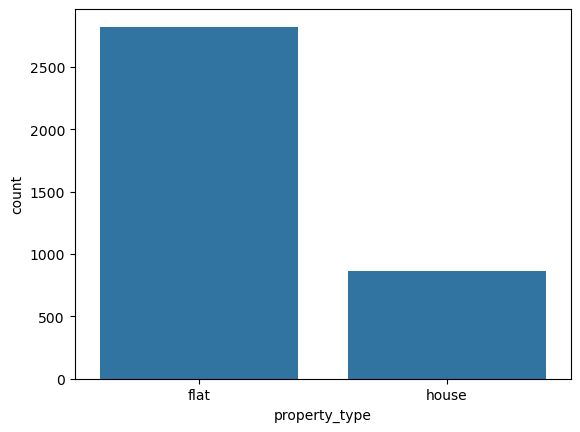

In [277]:
sns.barplot(df['property_type'].value_counts())
plt.show()

### Observations
- Flats are in majority(75 percent) and there are less number of houses(~25 percent)
- No missing values

## 2. society

In [346]:
df['society'].value_counts()

society
independent                             490
tulip violet                             75
ss the leaf                              73
shapoorji pallonji joyville gurugram     42
dlf new town heights                     42
                                       ... 
uphaar homes                              1
bsf chs                                   1
czar mahira homes 63a                     1
kamal residence                           1
emaar palm premier                        1
Name: count, Length: 682, dtype: int64

In [280]:
df['society'].value_counts().shape

(682,)

In [281]:
df[df['society'] != 'independent']['society'].value_counts(normalize = True).cumsum().head(77)

society
tulip violet                            0.023459
ss the leaf                             0.046293
dlf new town heights                    0.059431
shapoorji pallonji joyville gurugram    0.072568
signature global park                   0.083516
                                          ...   
umang monsoon breeze                    0.497654
central park flower valley              0.501408
unitech uniworld resorts                0.505161
mvn athens                              0.508915
ireo the corridors                      0.512668
Name: proportion, Length: 77, dtype: float64

In [282]:
society_counts = df['society'].value_counts()
# frequency distribution for society 
frequency = {
    'Very High (> 100)': (society_counts > 100).sum(),
    'High (50 - 100)': ((society_counts >= 50) & (society_counts <= 100)).sum(),
    "Average (10 - 49)": ((society_counts >= 10) & (society_counts < 50)).sum(),
    "Low (2 - 9)": ((society_counts > 1) & (society_counts < 10)).sum(),
    "Very Low (1)": (society_counts == 1).sum()
}
frequency

{'Very High (> 100)': np.int64(1),
 'High (50 - 100)': np.int64(2),
 'Average (10 - 49)': np.int64(92),
 'Low (2 - 9)': np.int64(273),
 'Very Low (1)': np.int64(314)}

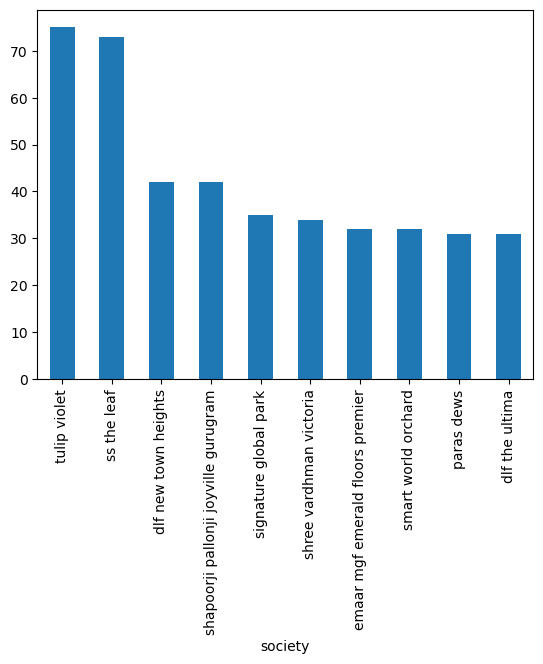

In [283]:
# top 10 society 
df[df['society'] != 'independent']['society'].value_counts().head(10).plot(kind='bar')
plt.show()

In [284]:
df['society'].isnull().sum()

np.int64(1)

### Observations
- Around 13.3% properties comes under independent tag.
- There are 705 societies.
- The top 77 societies have 50 percent of the preperties and the rest 50 percent of the properties come under the remaining 628 societies
    - Very High (>100): Only 1 society has more than 100 listings.
    - High (50-100): 2 societies have between 50 to 100 listings.
    - Average (10-49): 92 societies fall in this range with 10 to 49 listings each.
    - Low (2-9): 277 societies have between 2 to 9 listings.
    - Very Low (1): A significant number, 334 societies, have only 1 listing.
- 
*missing value* 1

## 3. sector

In [285]:
df['sector'].value_counts().shape

(98,)

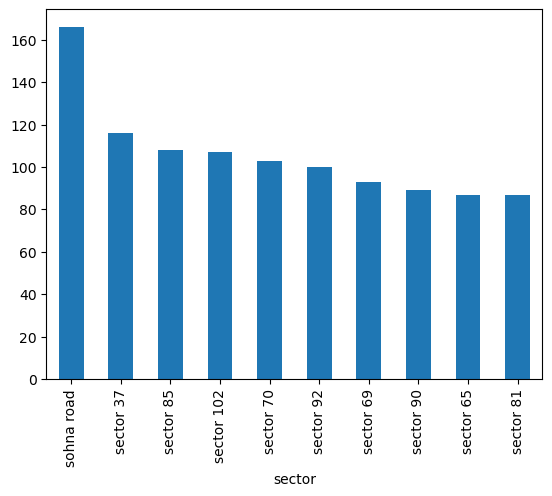

In [286]:
# top 10 sector
df['sector'].value_counts().head(10).plot(kind = 'bar')
plt.show()

In [287]:
# Frequency distribution for sectors
sector_counts = df['sector'].value_counts()

sector_frequency_bins = {
    "Very High (>100)": (sector_counts > 100).sum(),
    "High (50-100)": ((sector_counts >= 50) & (sector_counts <= 100)).sum(),
    "Average (10-49)": ((sector_counts >= 10) & (sector_counts < 50)).sum(),
    "Low (2-9)": ((sector_counts > 1) & (sector_counts < 10)).sum(),
    "Very Low (1)": (sector_counts == 1).sum()
}

sector_frequency_bins

{'Very High (>100)': np.int64(5),
 'High (50-100)': np.int64(24),
 'Average (10-49)': np.int64(50),
 'Low (2-9)': np.int64(19),
 'Very Low (1)': np.int64(0)}

In [288]:
df['sector'].isnull().sum()

np.int64(0)

### Observations
- There are a total of 97 unique sectors in the dataset.
- Frequency distribution of sectors:
    - Very High (>100): 5 sectors have more than 100 listings.
    - High (50-100): 24 sectors have between 50 to 100 listings.
    - Average (10-49): A majority, 51 sectors, fall in this range with 10 to 49 listings each.
    - Low (2-9): 17 sectors have between 2 to 9 listings.
    - Very Low (1): Interestingly, there are no sectors with only 1 listing.

## 4. price

In [289]:
df['price'].isnull().sum()

np.int64(17)

In [290]:
df['price'].describe()

count    3671.000000
mean        2.530281
std         2.978199
min         0.070000
25%         0.950000
50%         1.520000
75%         2.750000
max        31.500000
Name: price, dtype: float64

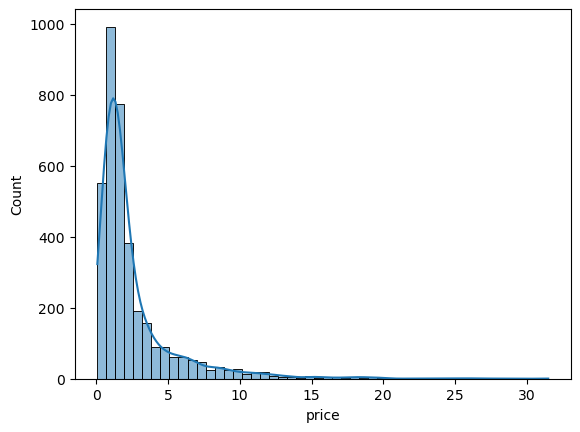

In [291]:
sns.histplot(df['price'], kde = True, bins = 50)
plt.show()

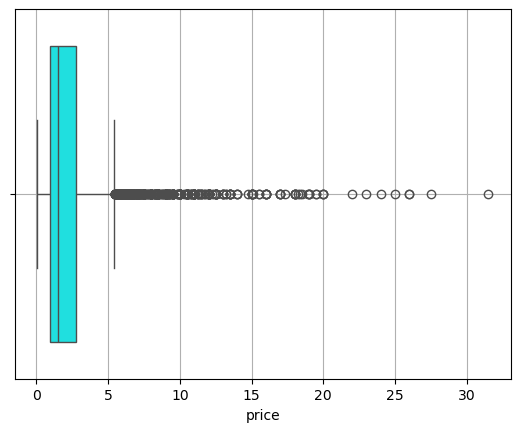

In [292]:
sns.boxplot(x = df['price'], color = 'cyan')
plt.grid()

### Descriptive Statistics:

- Count: There are 3,670 non-missing price entries.
- Mean Price: The average price is approximately 2.53 crores.
- Median Price: The median (or 50th percentile) price is 1.52 crores.
- Standard Deviation: The prices have a standard deviation of 2.98, indicating variability in the prices.
- Range: Prices range from a minimum of 0.07 crores to a maximum of 31.5 crores.
- IQR: The interquartile range (difference between 75th and 25th percentile) is from 0.95 crores to 2.75 crores.

### Visualizations:

- Distribution: The histogram indicates that most properties are priced in the lower range (below 5 crores), with a few properties going beyond 10 crores.
- Box Plot: The box plot showcases the spread of the data and potential outliers. Properties priced above approximately 10 crores might be considered outliers as they lie beyond the upper whisker of the box plot.</br>

*Missing Values*: There are 17 missing values in the price column.

In [293]:
# Skewness and Kurtosis
skewness = df['price'].skew()
kurtosis = df['price'].kurt()

print(skewness, kurtosis)

3.280819418037437 14.953973211335


**skewnes**: The price distribution has a skewness of approximately 3.28, indicating a positive skew. This means that the distribution tail is skewed to the right, which aligns with our observation from the histogram where most properties have prices on the lower end with a few high-priced properties.

**Kurtosis**: The kurtosis value is approximately 14.95. A kurtosis value greater than 3 indicates a distribution with heavier tails and more outliers compared to a normal distribution.

In [294]:
# quantile analysis
quantiles = df['price'].quantile([0.01, 0.05, 0.95, 0.99])
quantiles

0.01     0.25
0.05     0.37
0.95     8.50
0.99    15.22
Name: price, dtype: float64

### Quantile Analysis:

- 1% Quantile: Only 1% of properties are priced below 0.25 crores.
- 5% Quantile: 5% of properties are priced below 0.37 crores.
- 95% Quantile: 95% of properties are priced below 8.5 crores.
- 99% Quantile: 99% of properties are priced below 15.22 crores, indicating that very few properties are priced above this value.

In [295]:
# Identify potential outliers using IQR method
Q1 = df['price'].describe()['25%']
Q3 = df['price'].describe()['75%']
IQR = Q3 - Q1

IQR

np.float64(1.8)

In [296]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound, upper_bound)

-1.7500000000000002 5.45


In [297]:
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
outliers.shape

(426, 24)

In [298]:
outliers['price'].describe()

count    426.000000
mean       9.229202
std        4.062636
min        5.460000
25%        6.470000
50%        8.000000
75%       10.702500
max       31.500000
Name: price, dtype: float64

### Outliers Analysis (using IQR method):

- Based on the IQR method, there are 426 properties considered as outliers.
- These outliers have an average price of approximately 9.22 crores.
- The range for these outliers is from 5.46 crores to 31.5 crores.

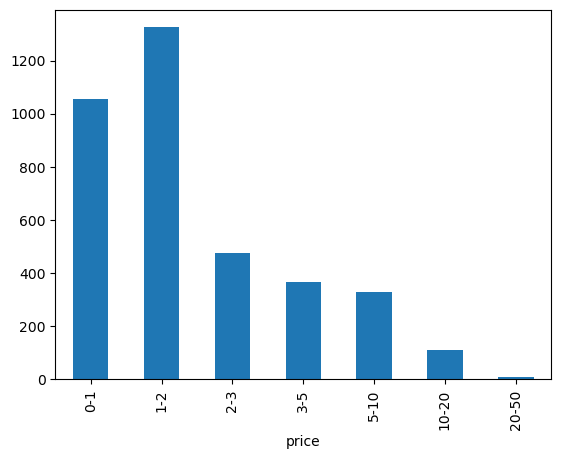

In [299]:
# price binning
bins = [0, 1, 2, 3, 5, 10, 20, 50]
bin_labels = ["0-1", "1-2", "2-3", "3-5", "5-10", "10-20", "20-50"]
pd.cut(df['price'], bins = bins, labels = bin_labels).value_counts().sort_index().plot(kind = 'bar')
plt.show()

- The majority of properties are priced in the "1-2 crores" and "2-3 crores" ranges.
- There's a significant drop in the number of properties priced above "5 crores."

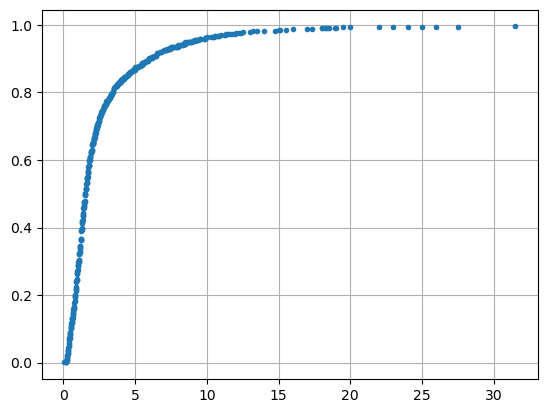

In [300]:
# ecdf plot
ecdf = df['price'].value_counts().sort_index().cumsum() / len(df['price'])
plt.plot(ecdf.index, ecdf, marker = '.', linestyle = 'none')
plt.grid()

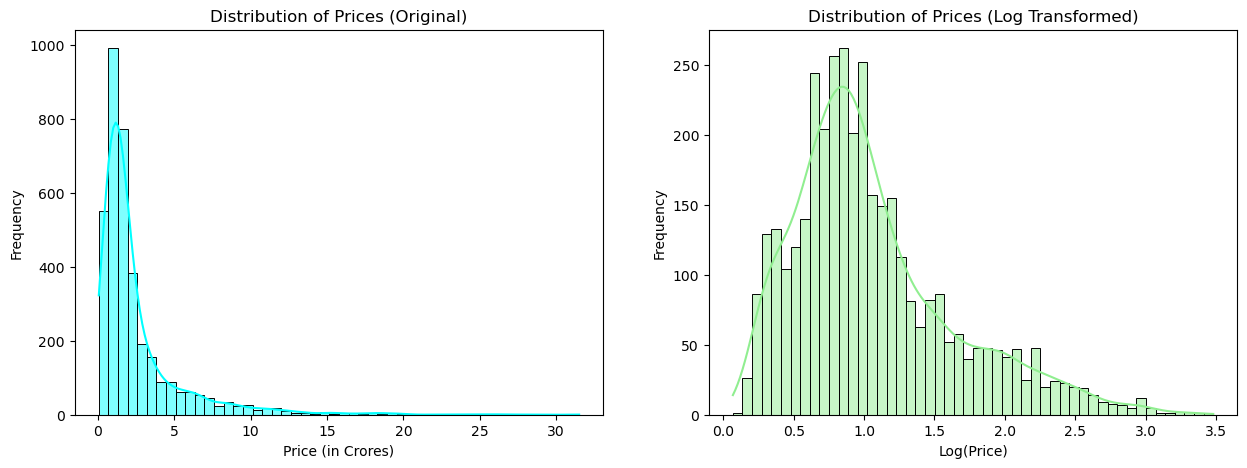

In [301]:
plt.figure(figsize = (15, 5))
# distribution plot without log transformation 
plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde = True, bins = 50, color = 'cyan')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# distribution plot with log transformation 
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['price']), kde = True, bins = 50, color = 'lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.show()

- **np.log1p(x)**: This function computes the natural logarithm of 1+x. It's designed to provide more accurate results for values of x that are very close to zero.

- Using np.log1p helps in transforming the price column while ensuring that any value (including zero, if present) is handled appropriately. When we need to reverse the transformation, we can use np.expm1 which computes e^x-1

In [302]:
skewness = np.log1p(df['price']).skew()
kurtosis = np.log1p(df['price']).kurt()

print(skewness, kurtosis)

1.074712643297074 0.9658746981133843


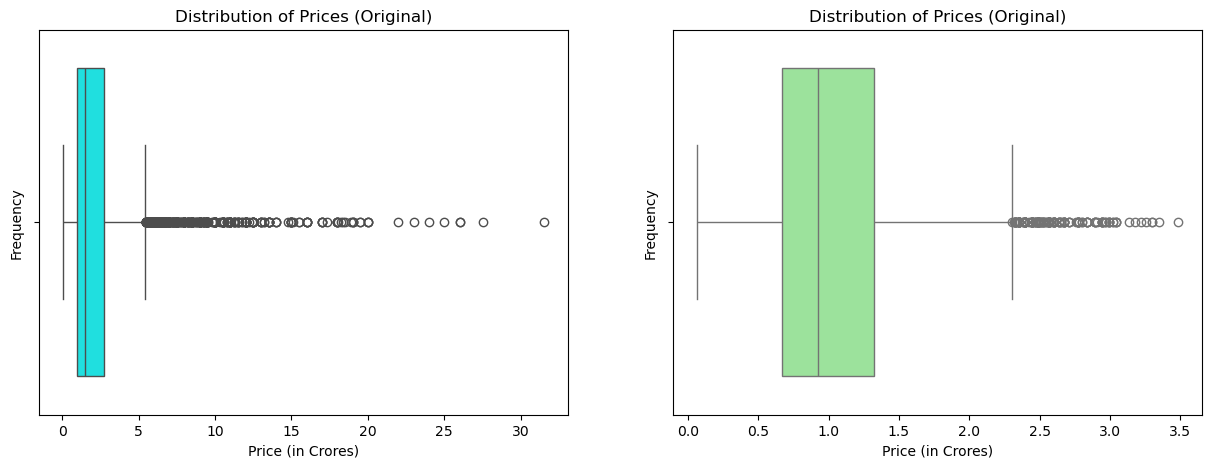

In [303]:
plt.figure(figsize = (15, 5))
# distribution without log transformation
plt.subplot(1, 2, 1)
sns.boxplot(x = df['price'], color = 'cyan')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# distribution with log transformation
plt.subplot(1, 2, 2)
sns.boxplot(x = np.log1p(df['price']), color = 'lightgreen')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

plt.show()

## 5. price_per_sqft

In [304]:
df['price_per_sqft'].isnull().sum()

np.int64(17)

In [305]:
df['price_per_sqft'].describe()

count      3671.000000
mean      13932.190139
std       23291.169213
min           4.000000
25%        6812.000000
50%        9016.000000
75%       13888.000000
max      600000.000000
Name: price_per_sqft, dtype: float64

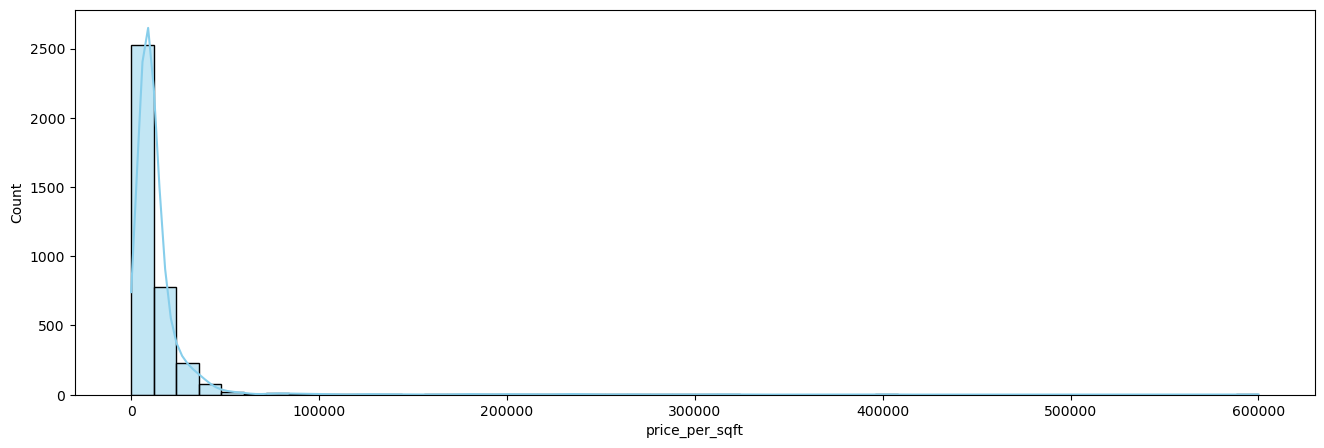

In [306]:
plt.figure(figsize = (16, 5))
sns.histplot(df['price_per_sqft'], bins = 50, color = 'skyblue', kde = True)
plt.show()

Most properties have a price_per_sqft ranging between approximately ₹0 and ₹40,000. There is a significant concentration in the lower range, with a few properties having exceptionally high price_per_sqft

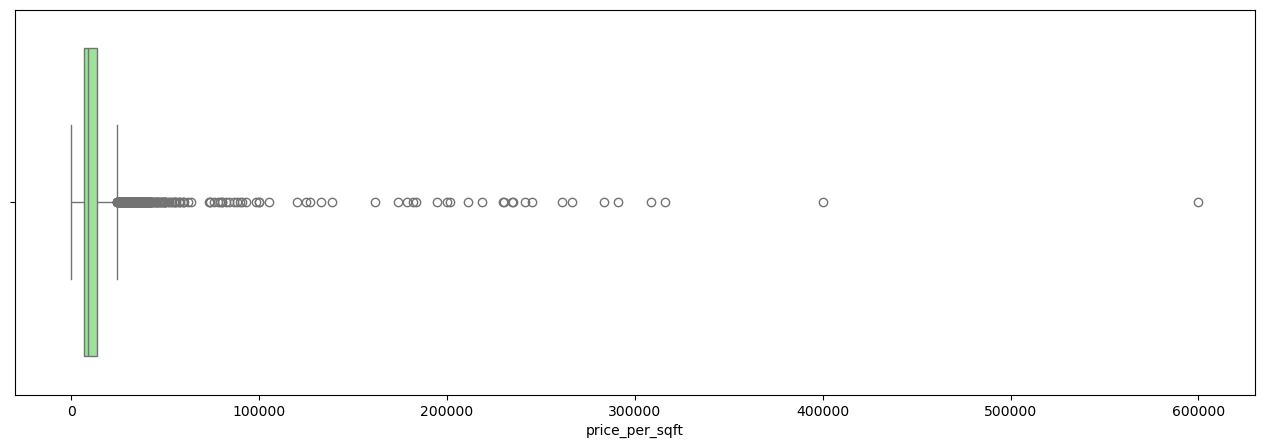

In [307]:
plt.figure(figsize = (16, 5))
sns.boxplot(x = df['price_per_sqft'], color = 'lightgreen')
plt.show()

The box plot clearly shows several outliers, especially on the higher side. The interquartile range (IQR) is relatively compact, but there are many data points beyond the "whiskers" of the box plot, indicating potential outliers

### Observations
- Potential Outliers
- Right Skewed
- 17 missing values

### 6. bedRoom 

In [308]:
df['bedRoom'].isnull().sum()

np.int64(0)

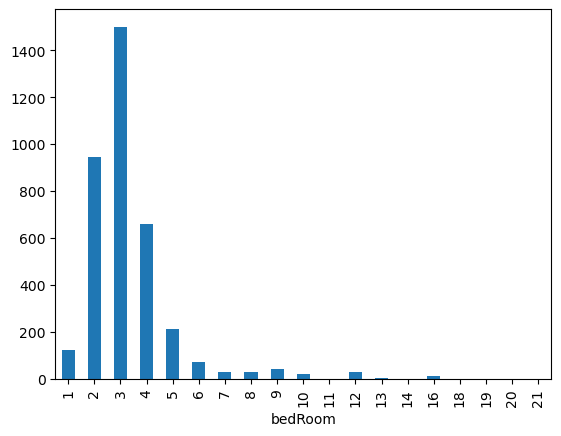

In [309]:
df['bedRoom'].value_counts().sort_index().plot(kind = 'bar')
plt.show()

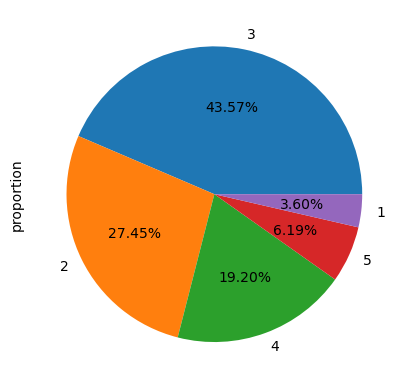

In [310]:
df['bedRoom'].value_counts(normalize = True).head().plot(kind = 'pie', autopct = '%0.2f%%')
plt.show()

## 7.  bathroom

In [311]:
df['bathroom'].isnull().sum()

np.int64(0)

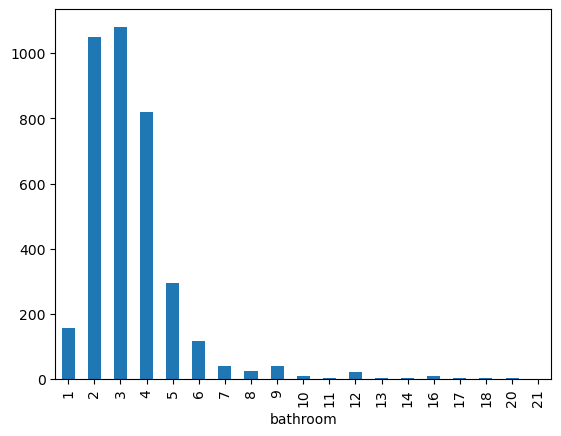

In [312]:
df['bathroom'].value_counts().sort_index().plot(kind = 'bar')
plt.show()

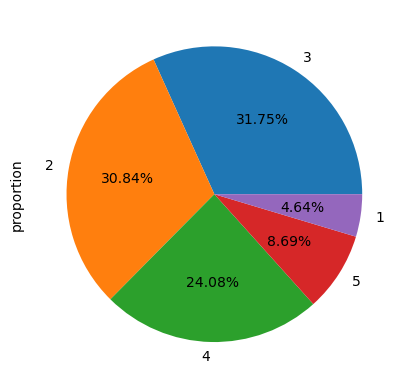

In [313]:
df['bathroom'].value_counts(normalize = True).head().plot(kind = 'pie', autopct = '%0.2f%%')
plt.show()

## 8. balcony 

In [314]:
df['balcony'].isnull().sum()

np.int64(0)

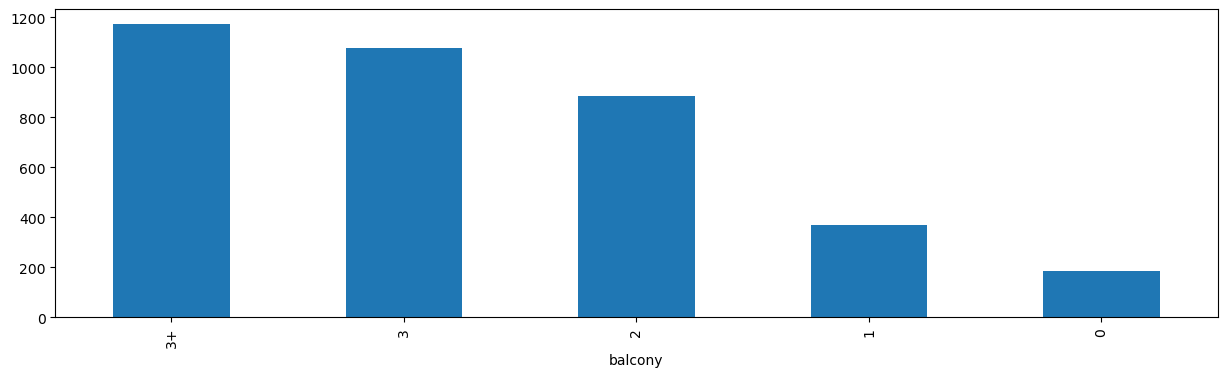

In [315]:
plt.figure(figsize = (15, 4))
df['balcony'].value_counts().plot(kind = 'bar')
plt.show()

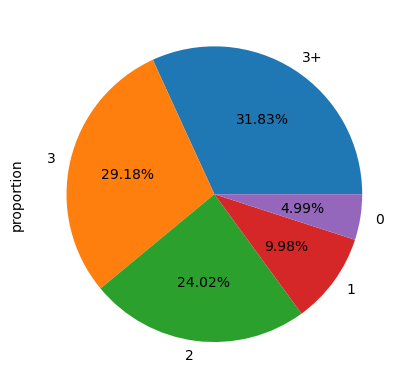

In [316]:
df['balcony'].value_counts(normalize = True).head().plot(kind = 'pie', autopct = '%0.2f%%')
plt.show()

## 9. floorNum

In [317]:
df['floorNum'].isnull().sum()

np.int64(20)

In [318]:
df['floorNum'].describe()

count    3668.000000
mean        6.793621
std         6.013637
min         0.000000
25%         2.000000
50%         5.000000
75%        10.000000
max        51.000000
Name: floorNum, dtype: float64

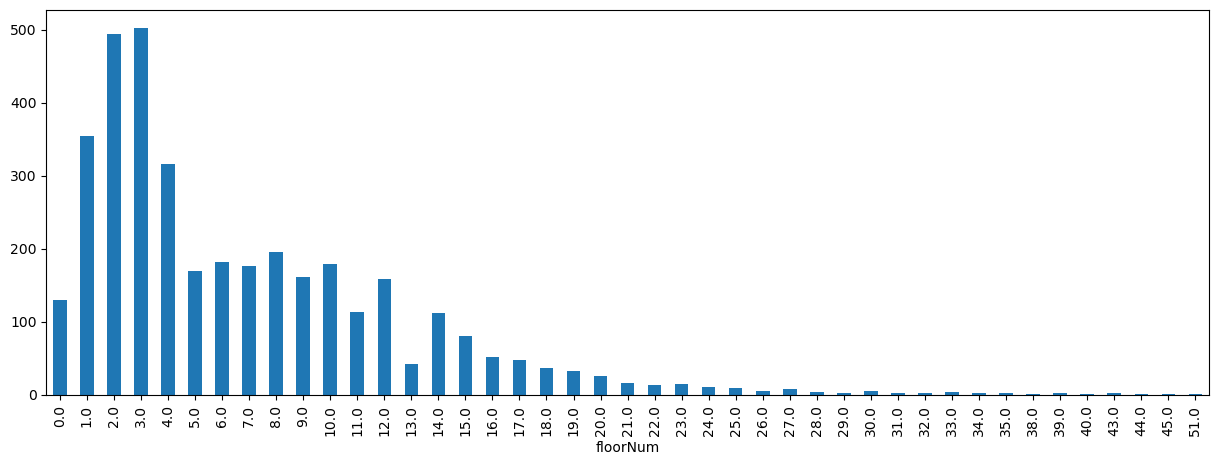

In [319]:
plt.figure(figsize = (15, 5))
df['floorNum'].value_counts().sort_index().plot(kind = 'bar')
plt.show()

<Axes: ylabel='floorNum'>

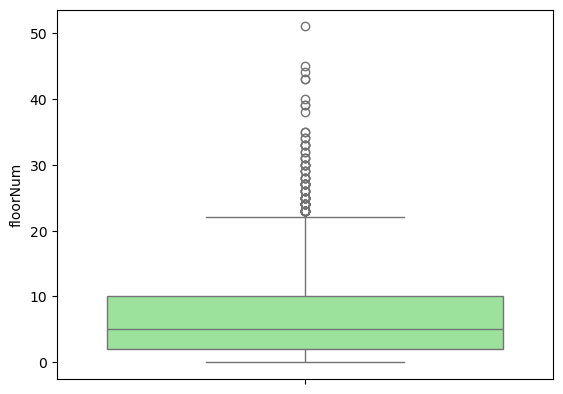

In [320]:
sns.boxplot(df['floorNum'], color = 'lightgreen')

- The majority of the properties lie between the ground floor (0) and the 25th floor.
- Floors 1 to 4 are particularly common, with the 3rd floor being the most frequent.
- There are a few properties located at higher floors, but their frequency is much lower.
- The box plot reveals that the majority of the properties are concentrated around the lower floors. The interquartile range (IQR) lies between approximately the 2nd and 10th floors.
- Data points beyond the "whiskers" of the box plot, especially on the higher side, indicate potential outliers.

## 10. facing 

In [321]:
df['facing'].isnull().sum()

np.int64(1049)

In [322]:
df['facing'].fillna('NA', inplace = True)

C:\Users\Shubham\AppData\Local\Temp\ipykernel_6140\2144030676.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['facing'].fillna('NA', inplace = True)


In [323]:
df['facing'].value_counts()

facing
NA            1049
East           625
North-East     624
North          390
West           249
South          231
North-West     193
South-East     174
South-West     153
Name: count, dtype: int64

## 11. agePossession 

In [324]:
df['agePossession'].isnull().sum()

np.int64(0)

In [325]:
df['agePossession'].value_counts()

agePossession
Relatively New        1648
New Property           593
Moderately Old         563
Undefined              448
Old Property           309
Under Construction     127
Name: count, dtype: int64

## 12. areas

**super built up area**

In [326]:
df['super_built_up_area'].isnull().sum()

np.int64(1812)

In [327]:
df['super_built_up_area'].describe()

count     1876.000000
mean      1924.104771
std        764.371152
min         89.000000
25%       1477.250000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

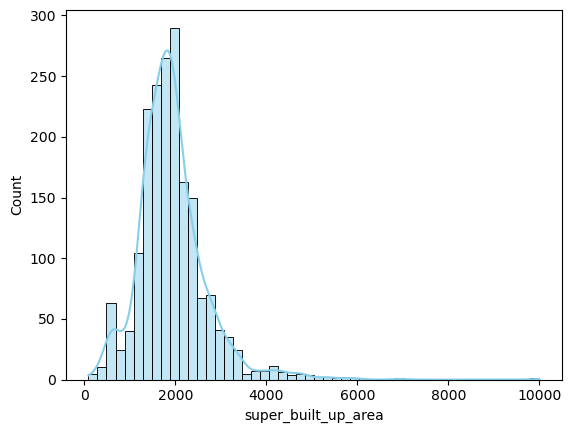

In [328]:
sns.histplot(df['super_built_up_area'].dropna(), bins = 50, color = 'skyblue', kde = True)
plt.show()

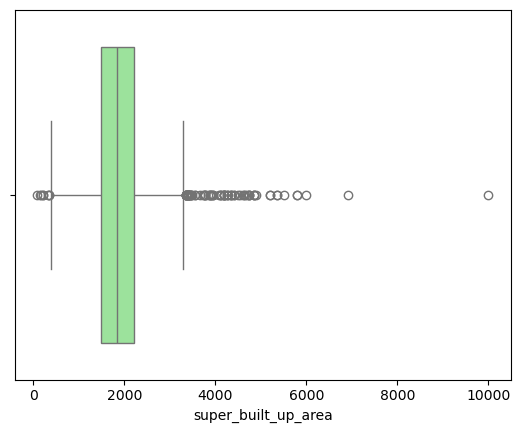

In [329]:
sns.boxplot(x = df['super_built_up_area'].dropna(), color = 'lightgreen')
plt.show()

- Most properties have a super built-up area ranging between approximately 1,000 sq.ft and 2,500 sq.ft.
- There are a few properties with a significantly larger area, leading to a right-skewed distribution.
- The interquartile range (IQR) lies between roughly 1,480 sq.ft and 2,215 sq.ft, indicating that the middle 50% of the properties fall within this range.
- There are several data points beyond the upper "whisker" of the box plot, indicating potential outliers. These are properties with an unusually large super built-up area.

**built up area**

In [330]:
df['built_up_area'].isnull().sum()

np.int64(1991)

In [331]:
df['built_up_area'].describe()

count      1697.000000
mean       2374.140854
std       17906.139496
min           2.000000
25%        1100.000000
50%        1650.000000
75%        2400.000000
max      737147.000000
Name: built_up_area, dtype: float64

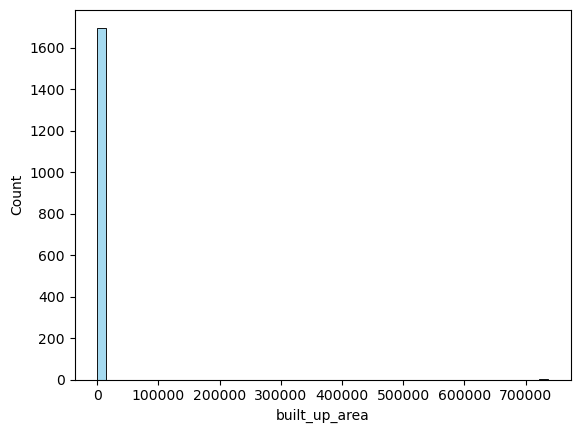

In [332]:
sns.histplot(df['built_up_area'].dropna(), bins = 50, color = 'skyblue', kde = False)
plt.show()

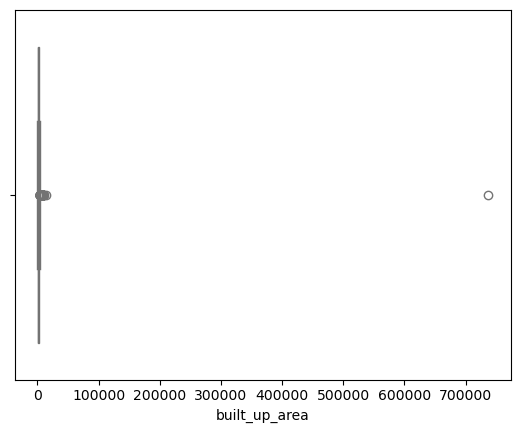

In [333]:
sns.boxplot(x = df['built_up_area'].dropna(), color = 'lightgreen')
plt.show()

- Most properties have a built-up area ranging roughly between 500 sq.ft and 3,500 sq.ft.
- There are very few properties with a much larger built-up area, leading to a highly right-skewed distribution.
- The box plot confirms the presence of significant outliers on the higher side. The data's interquartile range (IQR) is relatively compact, but the "whiskers" of the box plot are stretched due to the outliers.
    
The presence of extreme values, especially on the higher side, suggests that there may be outliers or data errors. This could also be due to some properties being exceptionally large, like a commercial complex or an entire building being listed.

**carpet area**

In [334]:
df['carpet_area'].isnull().sum()

np.int64(1813)

In [335]:
df['carpet_area'].describe()

count      1875.000000
mean       2528.087487
std       22781.604116
min          15.000000
25%         845.000000
50%        1300.000000
75%        1790.500000
max      607936.000000
Name: carpet_area, dtype: float64

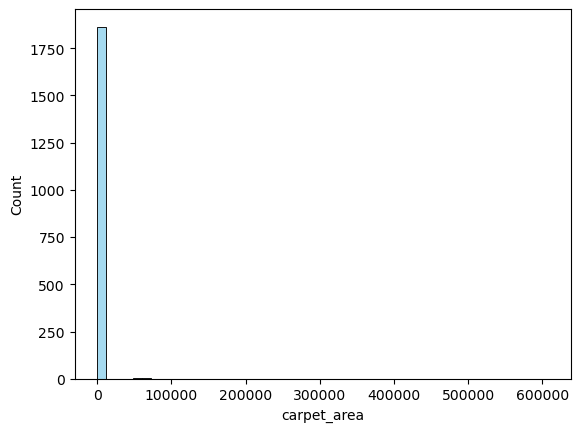

In [336]:
sns.histplot(df['carpet_area'].dropna(), bins = 50, color = 'skyblue', kde = False)
plt.show()

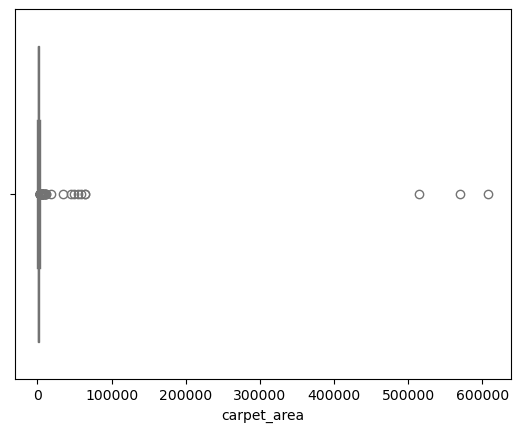

In [337]:
sns.boxplot(x = df['carpet_area'].dropna(), color = 'lightgreen')
plt.show()

## 13. additional rooms

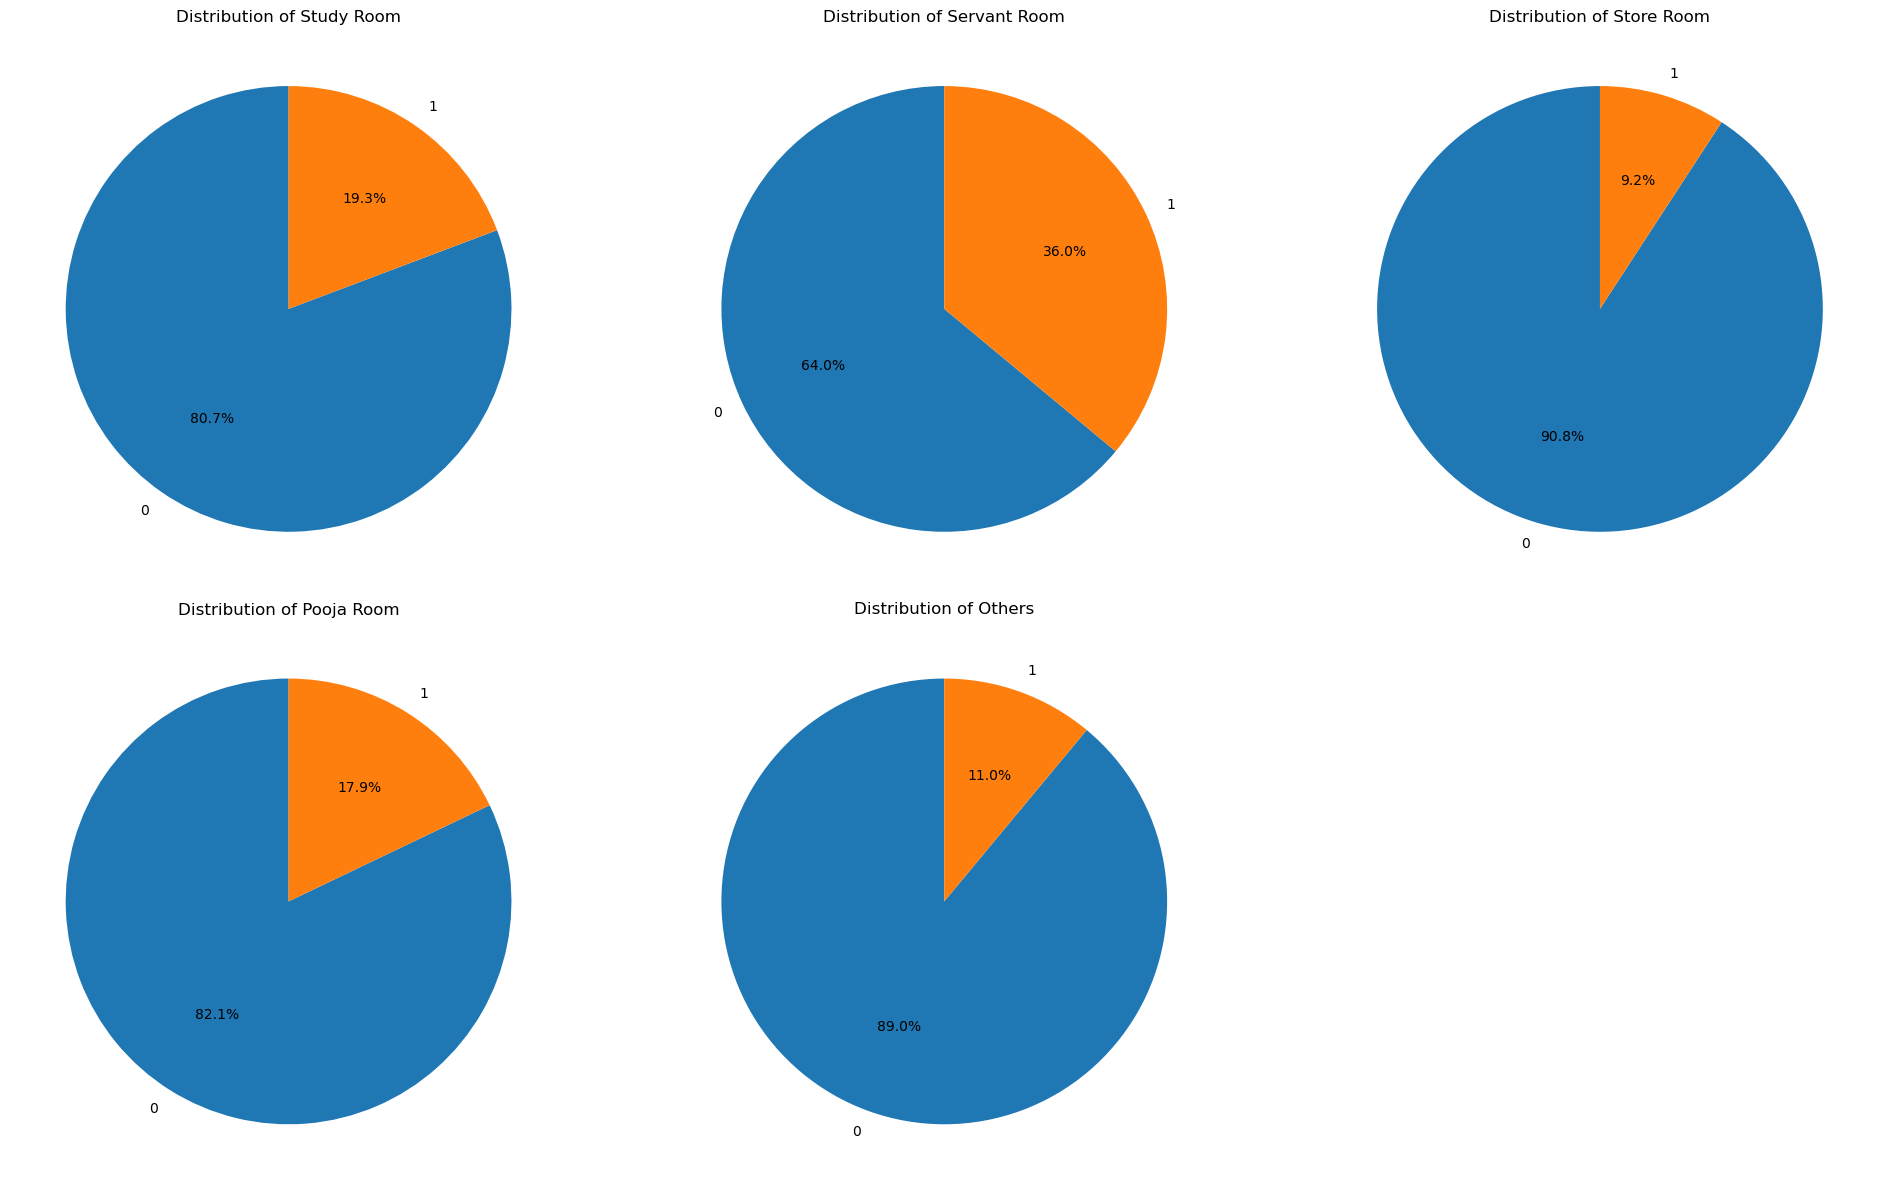

In [338]:
plt.figure(figsize=(20, 12))

# Create a subplot of pie charts for each room type
for idx, room in enumerate(['study room','servant room','store room','pooja room','others'], 1):
    ax = plt.subplot(2, 3, idx)
    df[room].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=ax)
    plt.title(f'Distribution of {room.title()}')
    plt.ylabel('')

plt.tight_layout()
plt.show()

## 14. furnishing_type

In [339]:
df['furnished_type'].value_counts()

furnished_type
0    2418
1    1060
2     210
Name: count, dtype: int64

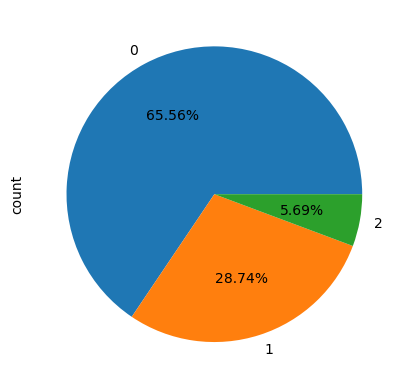

In [340]:
df['furnished_type'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%')
plt.show()

## 15. luxury score

In [341]:
df['luxury_score'].isnull().sum()

np.int64(0)

In [342]:
df['luxury_score'].describe()

count    3688.000000
mean       71.393167
std        53.051980
min         0.000000
25%        31.000000
50%        59.000000
75%       110.000000
max       174.000000
Name: luxury_score, dtype: float64

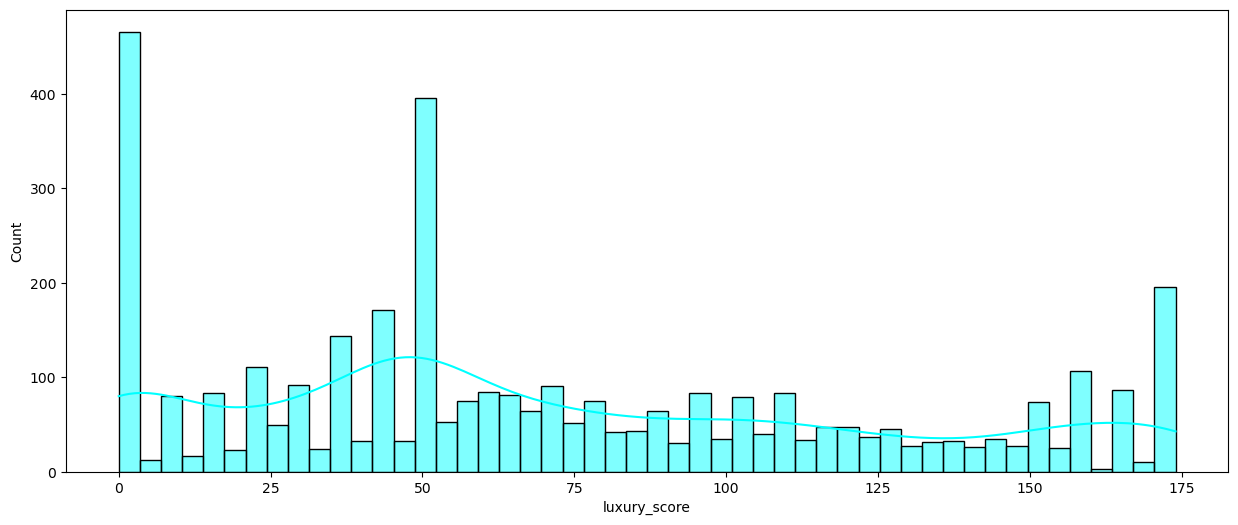

In [343]:
plt.figure(figsize=(15, 6))
sns.histplot(df['luxury_score'], bins = 50, color = 'cyan', kde = True)
plt.show()

<Axes: xlabel='luxury_score'>

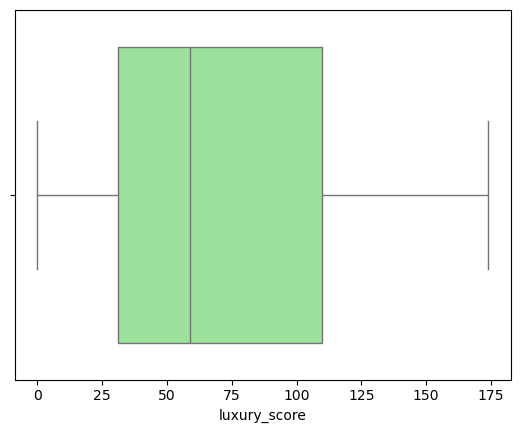

In [344]:
sns.boxplot(x = df['luxury_score'], color = 'lightgreen')

The luxury score distribution has multiple peaks, suggesting a multi modal distribution. There's a significant number of properties with lower luxury scores (around 0-50), and another peak is observed around the 110-130 range.

The box plot reveals that the majority of the properties have luxury scores between approximately 30 and 110. The interquartile range (IQR) lies between these values.